In [71]:
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import numpy as np

golden_ratio = (1 + 5**0.5) / 2
textwidth = 455.24411 / 72 # inches
textwidth = textwidth * 0.44 * golden_ratio # about 0.712 textwidth

mpl.rcParams['figure.dpi'] = 600
mpl.rcParams['figure.figsize'] = (textwidth, textwidth / golden_ratio)
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.family'] = "Computer Modern Roman"
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['figure.titlesize'] = 12
mpl.rcParams["figure.autolayout"] = True
mpl.rcParams['text.usetex'] = True

import seaborn as sns
import pandas as pd
import tensorboard as tb
from matplotlib.ticker import EngFormatter

In [60]:
# experiment_id="syj4nyOVTNyRgxdYQx0iQQ" # old results
# experiment_id="GTG7kOYrRd6EDvYPVIgSDQ" # medusa
experiment_id = "3TOtgKwbQ3W4aNYr8GMAkg" # medusa 11

experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars()
df

,run,tag,step,value
0,dzmoriya2D/L4/2022-12-30T200233_J1.0_D1.4_B0.0...,eval/mean_ep_length,40000,16.000000
1,dzmoriya2D/L4/2022-12-30T200233_J1.0_D1.4_B0.0...,eval/mean_ep_length,80000,16.000000
2,dzmoriya2D/L4/2022-12-30T200233_J1.0_D1.4_B0.0...,eval/mean_ep_length,120000,16.000000
3,dzmoriya2D/L4/2022-12-30T200233_J1.0_D1.4_B0.0...,eval/mean_ep_length,160000,16.000000
4,dzmoriya2D/L4/2022-12-30T200233_J1.0_D1.4_B0.0...,eval/mean_ep_length,200000,16.000000
...,...,...,...,...
756514,xy2D/L8/2022-12-30T113924_cnn_nenvs8_nfeatures...,train/value_loss,1992704,0.008171
756515,xy2D/L8/2022-12-30T113924_cnn_nenvs8_nfeatures...,train/value_loss,1994752,0.006799
756516,xy2D/L8/2022-12-30T113924_cnn_nenvs8_nfeatures...,train/value_loss,1995000,0.007075
756517,xy2D/L8/2022-12-30T113924_cnn_nenvs8_nfeatures...,train/value_loss,1998848,0.007916


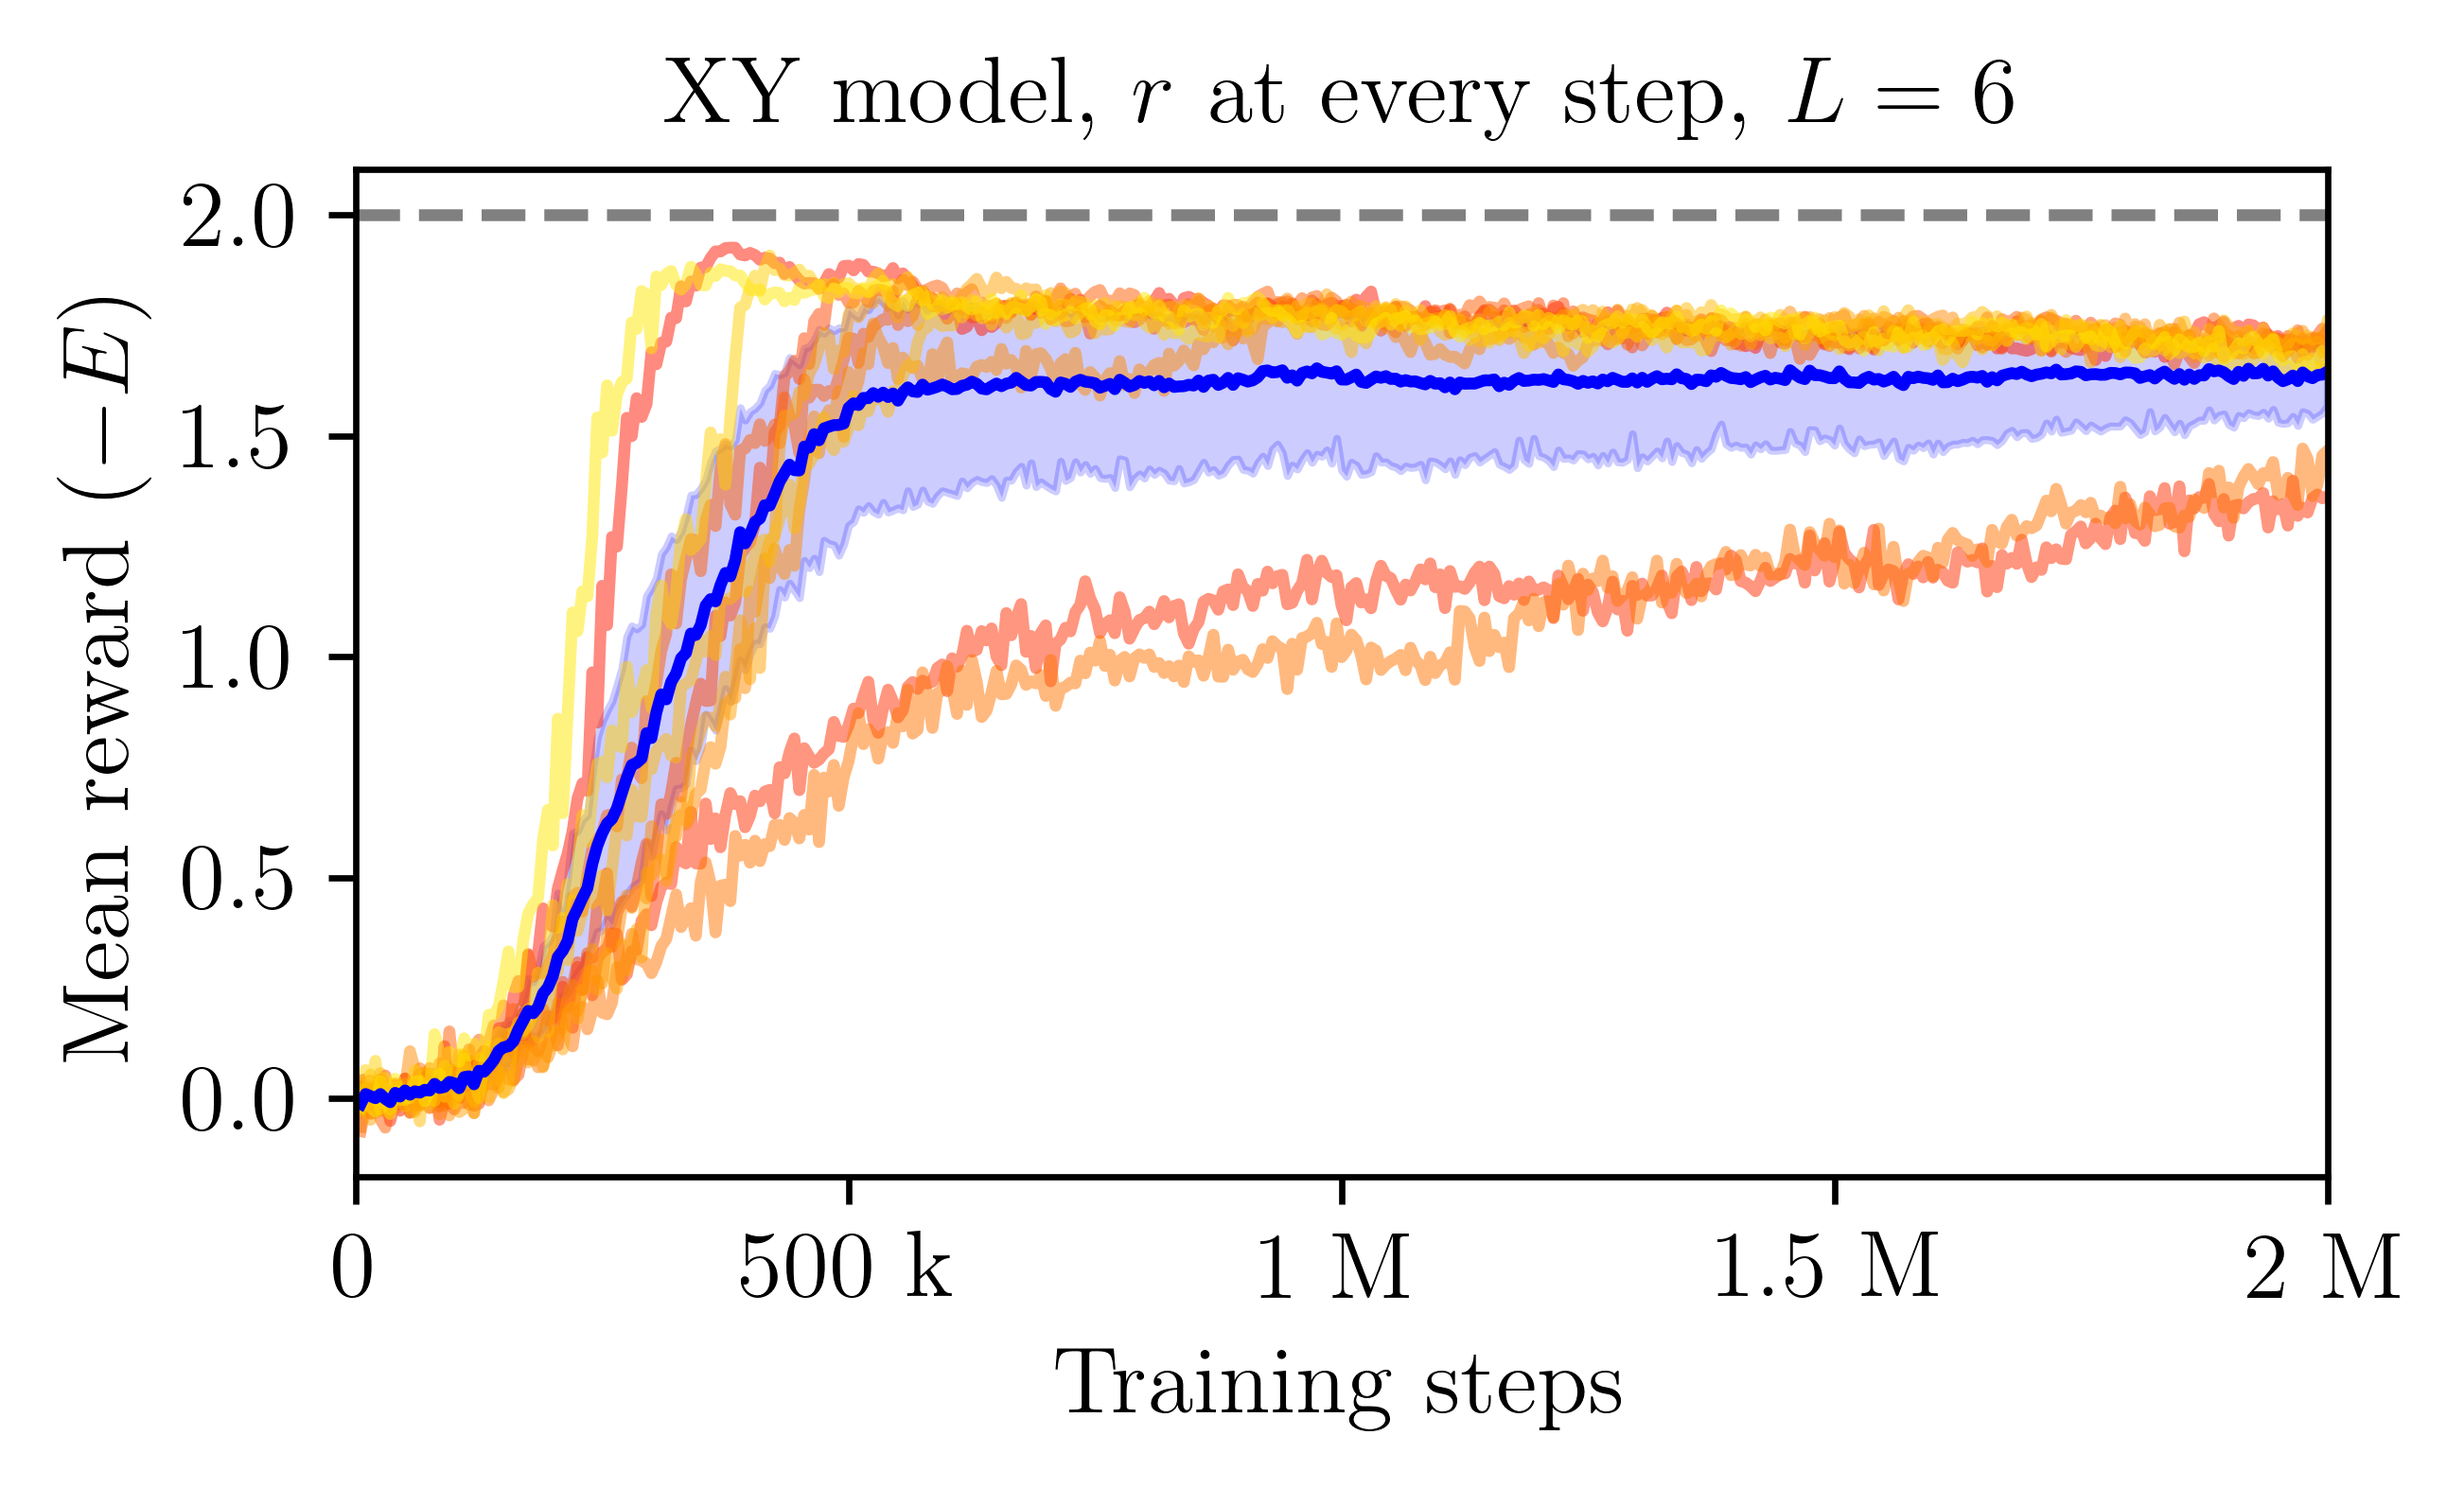

In [72]:
df_val = df[df["run"].str.contains("xy2D/L6/continuous") & df["tag"].str.contains("eval/mean_reward")]

fig, ax = plt.subplots(figsize=(textwidth, textwidth / golden_ratio))

sns.lineplot(ax=ax, data=df_val, x="step", y="value", errorbar=('ci', 95), hue='run', alpha=0.5, palette="autumn")
sns.lineplot(ax=ax, data=df_val, x="step", y="value", errorbar=('ci', 95), color="blue")


ax.xaxis.set_major_formatter(EngFormatter())
plt.xlim(0, df_val["step"].max()) 
plt.xlabel("Training steps")
plt.ylabel("Mean reward $(-E)$")
plt.legend().remove()

ax.hlines(2, 0, df_val["step"].max(), linestyles="dashed", label="True minimum", color="gray")
plt.title("XY model, $r$ at every step, $L=6$")
plt.savefig("../results/xy_L6_continuous_training.pdf")

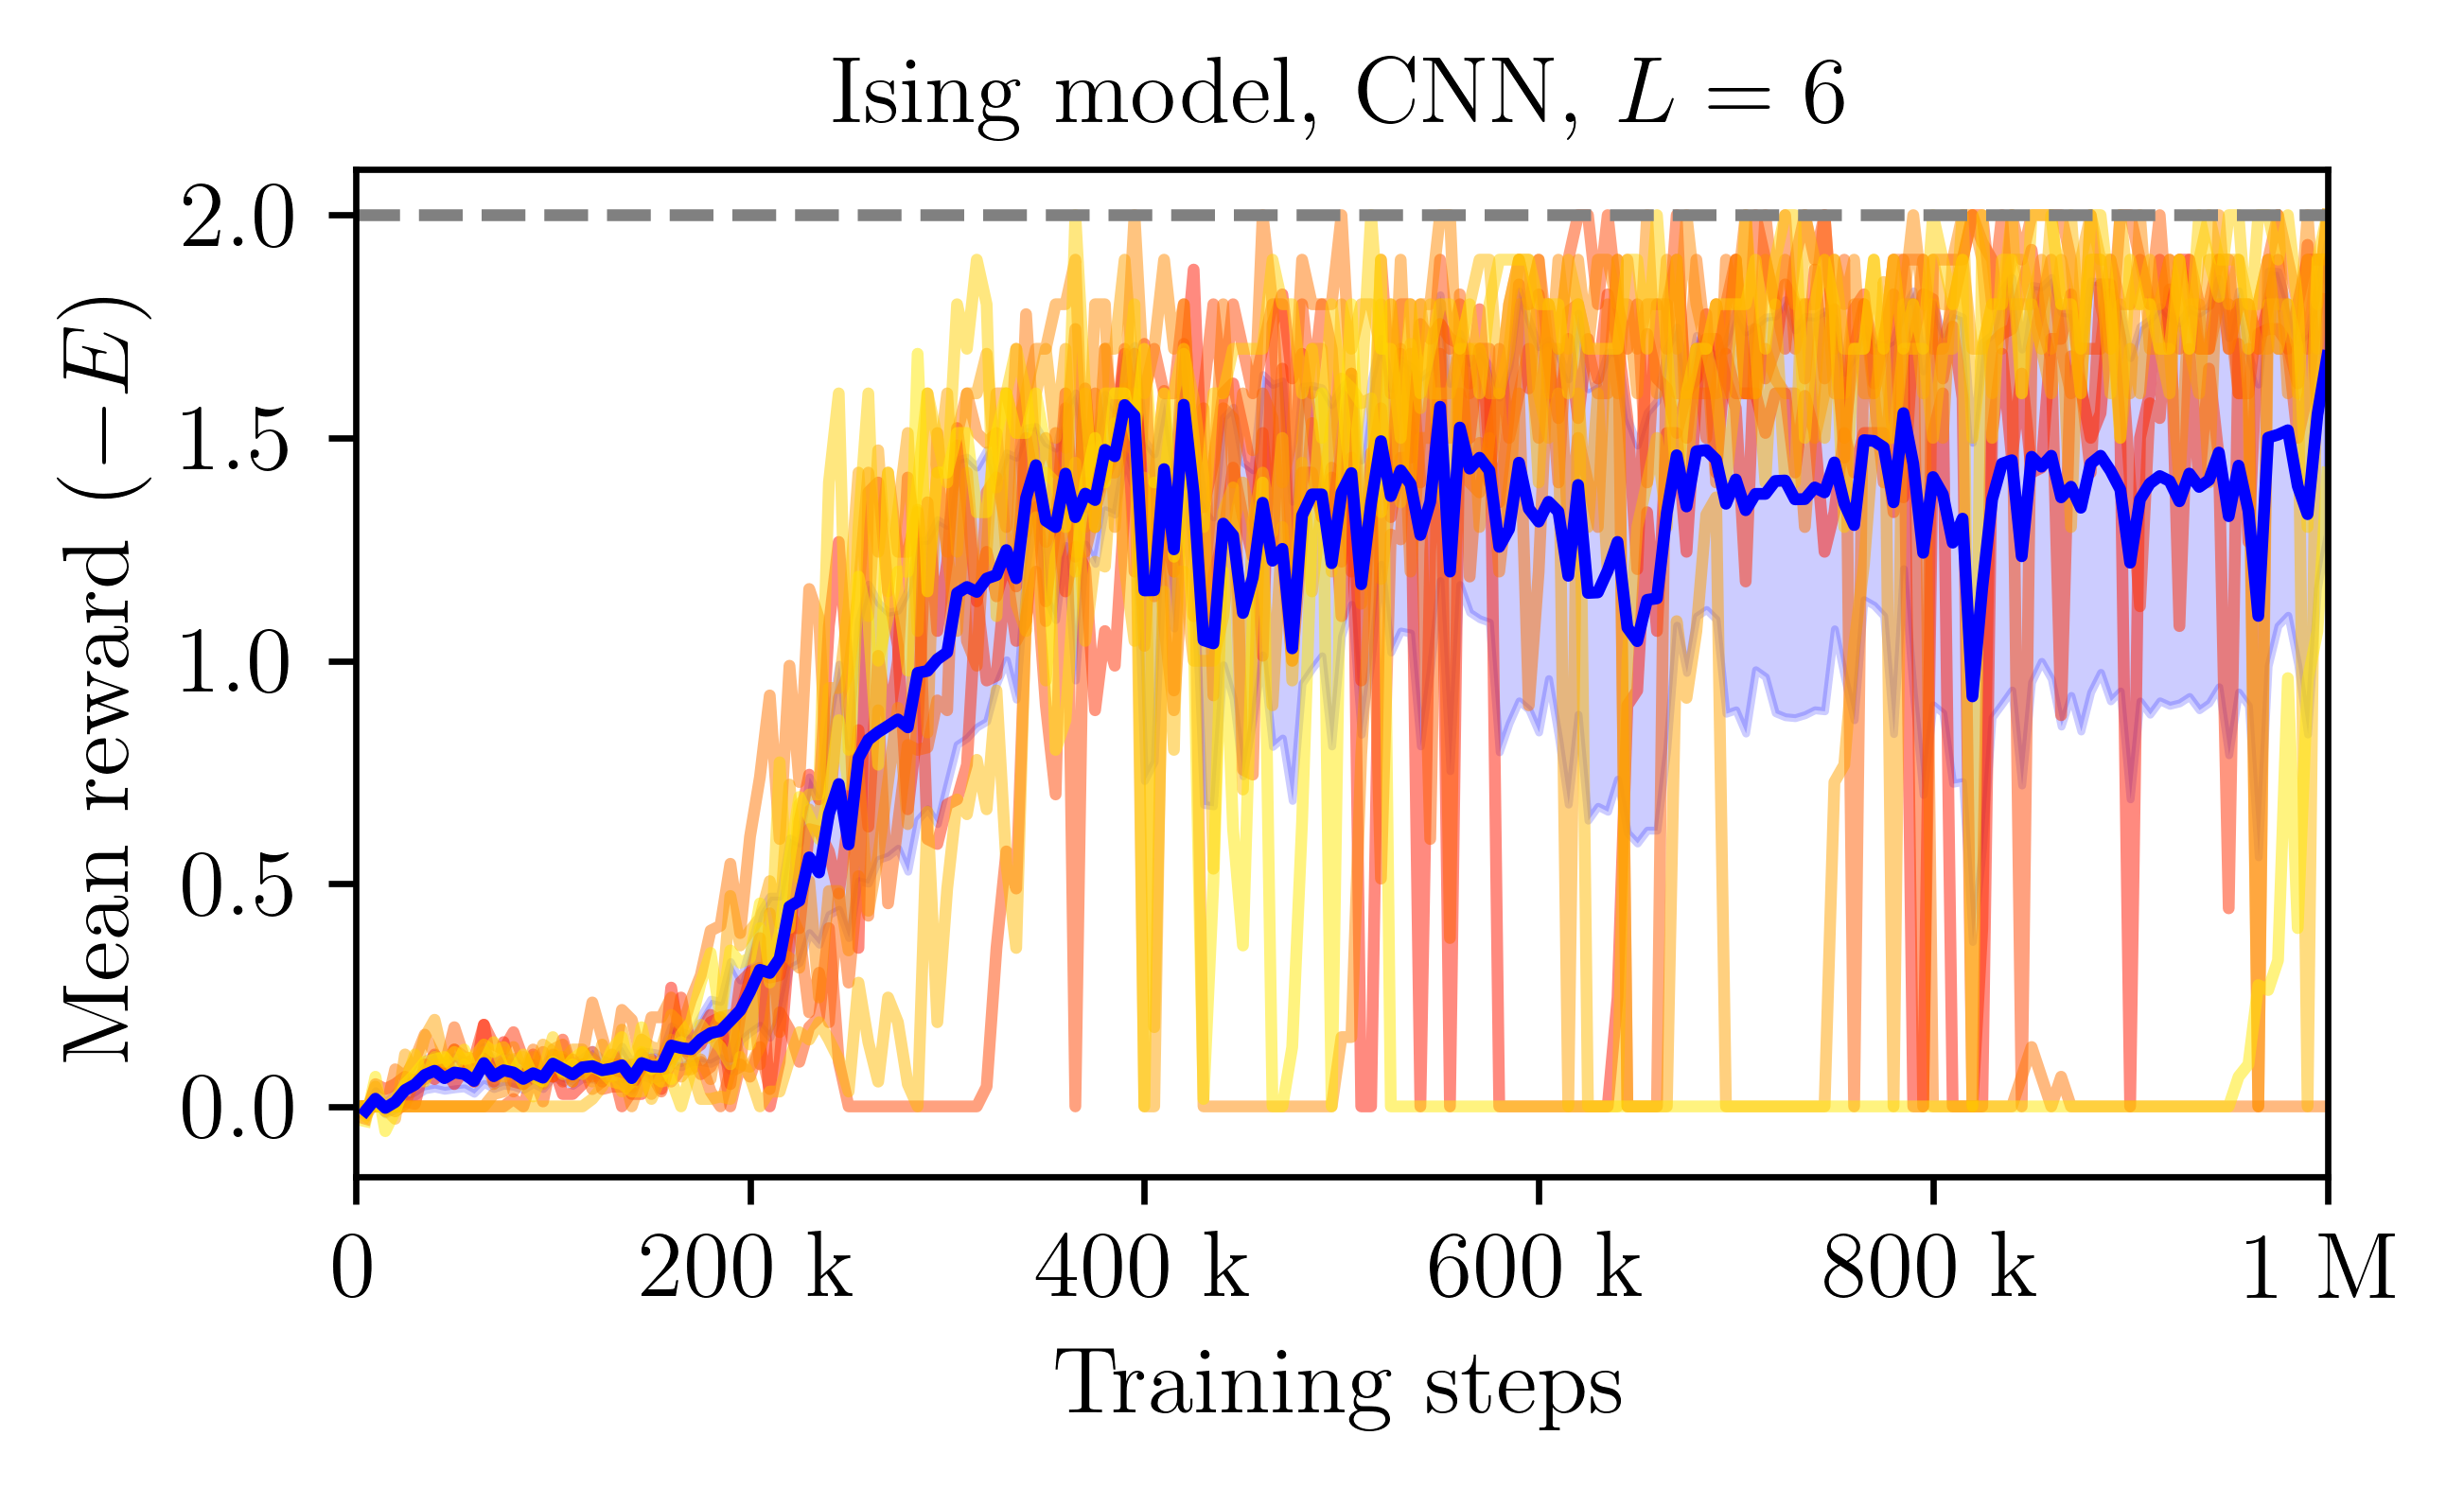

In [79]:
df_val = df[df["run"].str.contains("ising2D/L6.*cstmpol") & df["tag"].str.contains("eval/mean_reward")]

fig, ax = plt.subplots(figsize=(textwidth, textwidth / golden_ratio))

sns.lineplot(ax=ax, data=df_val, x="step", y="value", errorbar=('ci', 95), hue='run', alpha=0.5, palette="autumn")
sns.lineplot(ax=ax, data=df_val, x="step", y="value", errorbar=('ci', 95), color="blue")


ax.xaxis.set_major_formatter(EngFormatter())
plt.xlim(0, df_val["step"].max()) 
plt.xlabel("Training steps")
plt.ylabel("Mean reward $(-E)$")
plt.legend().remove()

ax.hlines(2, 0, df_val["step"].max(), linestyles="dashed", label="True minimum", color="gray")
plt.title("Ising model, CNN, $L=6$")
plt.savefig("../results/ising_L6CNN_training.pdf")

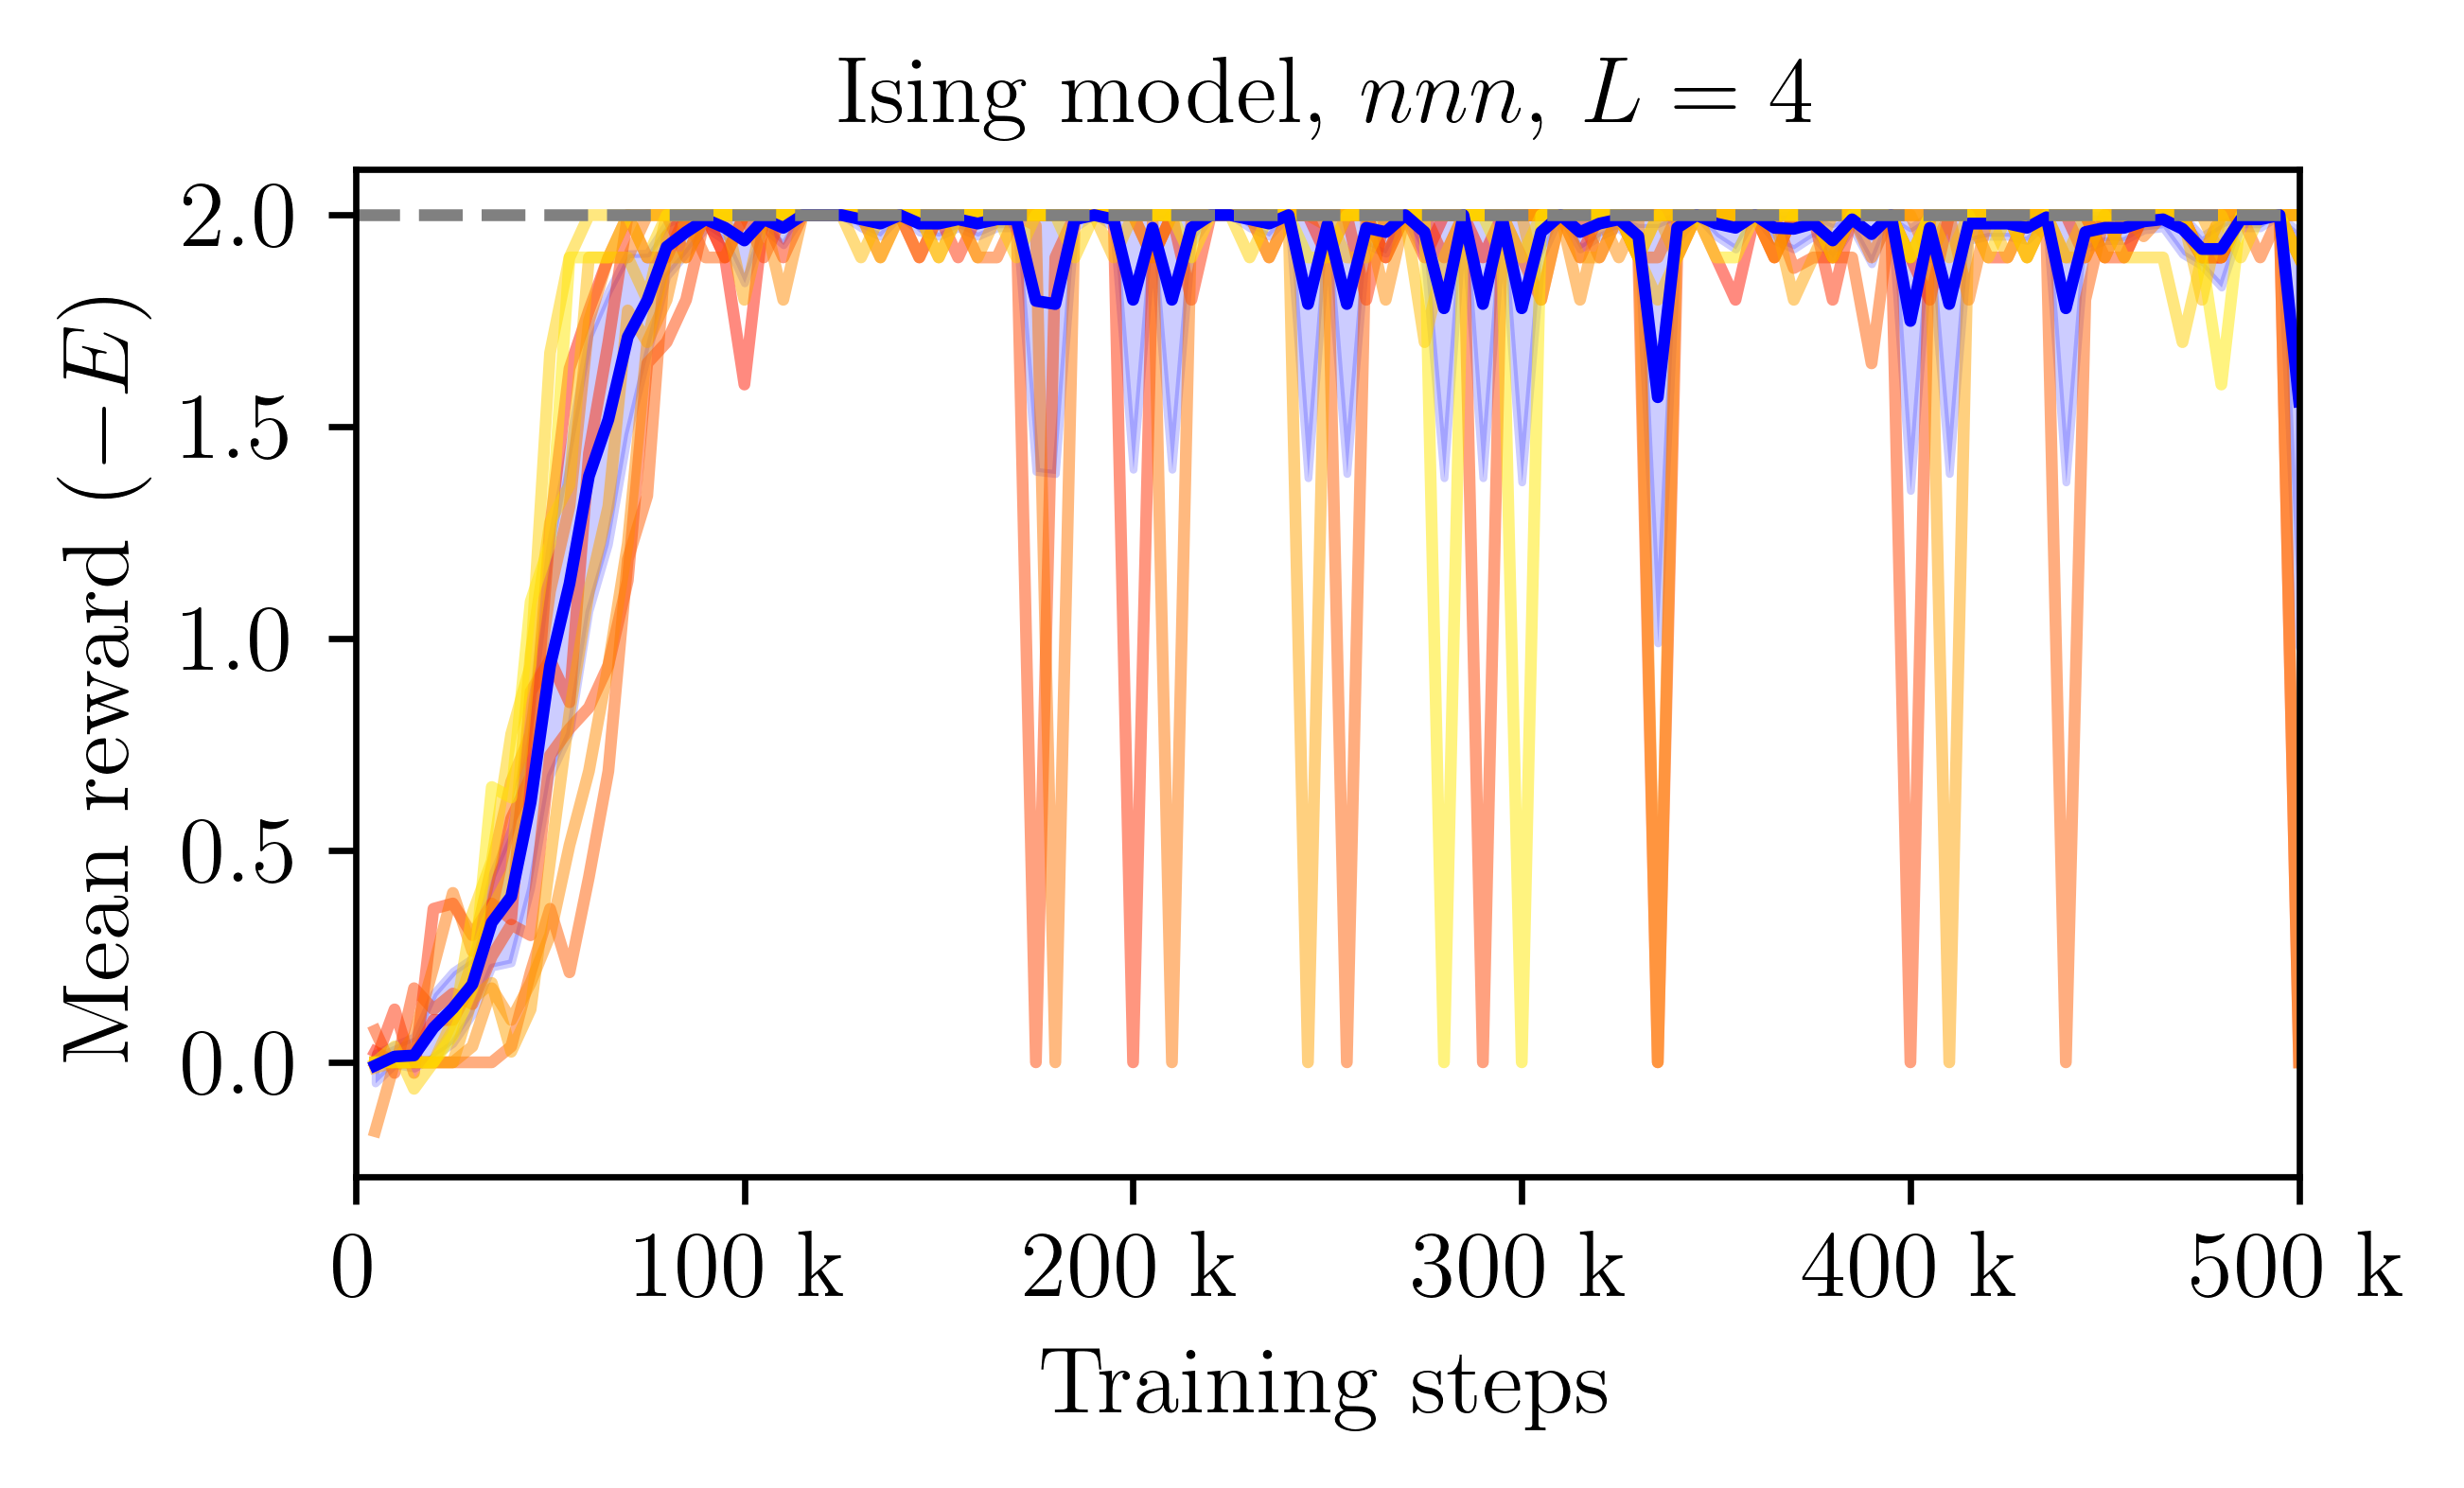

In [73]:
df_val = df[df["run"].str.contains("ising2D_2ndNN/L4/") & df["tag"].str.contains("eval/mean_reward")]

fig, ax = plt.subplots(figsize=(textwidth, textwidth / golden_ratio))

sns.lineplot(ax=ax, data=df_val, x="step", y="value", errorbar=('ci', 95), hue='run', alpha=0.5, palette="autumn")
sns.lineplot(ax=ax, data=df_val, x="step", y="value", errorbar=('ci', 95), color="blue")


ax.xaxis.set_major_formatter(EngFormatter())
plt.xlim(0, df_val["step"].max()) 
plt.xlabel("Training steps")
plt.ylabel("Mean reward $(-E)$")
plt.legend().remove()

ax.hlines(2, 0, df_val["step"].max(), linestyles="dashed", label="True minimum", color="gray")
plt.title("Ising model, $nnn$, $L=4$")
plt.savefig("../results/isingNNN_training.pdf")

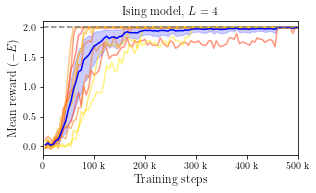

In [10]:
df_val = df[df["run"].str.contains("ising2D/L4/") & df["tag"].str.contains("eval/mean_reward")]

fig, ax = plt.subplots(figsize=(textwidth, textwidth / golden_ratio))

sns.lineplot(ax=ax, data=df_val, x="step", y="value", errorbar=('ci', 95), hue='run', alpha=0.5, palette="autumn")
sns.lineplot(ax=ax, data=df_val, x="step", y="value", errorbar=('ci', 95), color="blue")


ax.xaxis.set_major_formatter(EngFormatter())
plt.xlim(0, df_val["step"].max()) 
plt.xlabel("Training steps")
plt.ylabel("Mean reward $(-E)$")
plt.legend().remove()

ax.hlines(2, 0, df_val["step"].max(), linestyles="dashed", label="True minimum", color="gray")
plt.title("Ising model, $L=4$")
plt.savefig("../results/ising_L4_training.pdf")

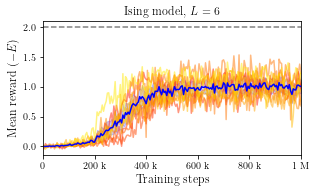

In [12]:
df_val = df[df["run"].str.contains("ising2D/L6/") & df["tag"].str.contains("eval/mean_reward")]

fig, ax = plt.subplots(figsize=(textwidth, textwidth / golden_ratio))
sns.lineplot(ax=ax, data=df_val, x="step", y="value", errorbar=('ci', 95), hue='run', alpha=0.5, palette="autumn")
sns.lineplot(ax=ax, data=df_val, x="step", y="value", errorbar=('ci', 95), color="blue")

ax.xaxis.set_major_formatter(EngFormatter())
plt.xlim(0, df_val["step"].max()) 
plt.xlabel("Training steps")
plt.ylabel("Mean reward $(-E)$")
plt.legend().remove()

ax.hlines(2, 0, df_val["step"].max(), linestyles="dashed", label="True minimum", color="gray")
plt.title("Ising model, $L=6$")
plt.savefig("../results/ising_L6_training.pdf")

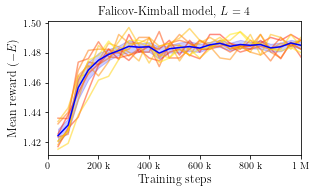

In [13]:
df_val = df[df["run"].str.contains("falicovkimball2D/L4/") & df["tag"].str.contains("eval/mean_reward")]

fig, ax = plt.subplots(figsize=(textwidth, textwidth / golden_ratio))
sns.lineplot(ax=ax, data=df_val, x="step", y="value", errorbar=('ci', 95), hue='run', alpha=0.5, palette="autumn")
sns.lineplot(ax=ax, data=df_val, x="step", y="value", errorbar=('ci', 95), color="blue")


ax.xaxis.set_major_formatter(EngFormatter())
plt.xlim(0, df_val["step"].max()) 
plt.xlabel("Training steps")
plt.ylabel("Mean reward $(-E)$")
plt.legend().remove()

# ax.hlines(2, 0, df_val["step"].max(), linestyles="dashed", label="True minimum")
plt.title("Falicov-Kimball model, $L=4$")
plt.savefig("../results/falicovkimball_L4_training.pdf")

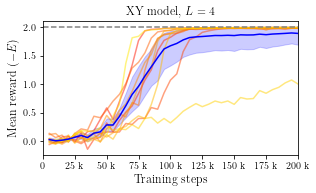

In [25]:
df_val = df[df["run"].str.contains("xy2D/L4/") & df["tag"].str.contains("eval/mean_reward")]

fig, ax = plt.subplots(figsize=(textwidth, textwidth / golden_ratio))

sns.lineplot(ax=ax, data=df_val, x="step", y="value", errorbar=('ci', 95), hue='run', alpha=0.5, palette="autumn")
sns.lineplot(ax=ax, data=df_val, x="step", y="value", errorbar=('ci', 95), color="blue")


ax.xaxis.set_major_formatter(EngFormatter())
plt.xlim(0, df_val["step"].max()) 
plt.xlabel("Training steps")
plt.ylabel("Mean reward $(-E)$")
plt.legend().remove()

ax.hlines(2, 0, df_val["step"].max(), linestyles="dashed", label="True minimum", color="gray")
plt.title("XY model, $L=4$")
plt.savefig("../results/xy_L4_training.pdf")


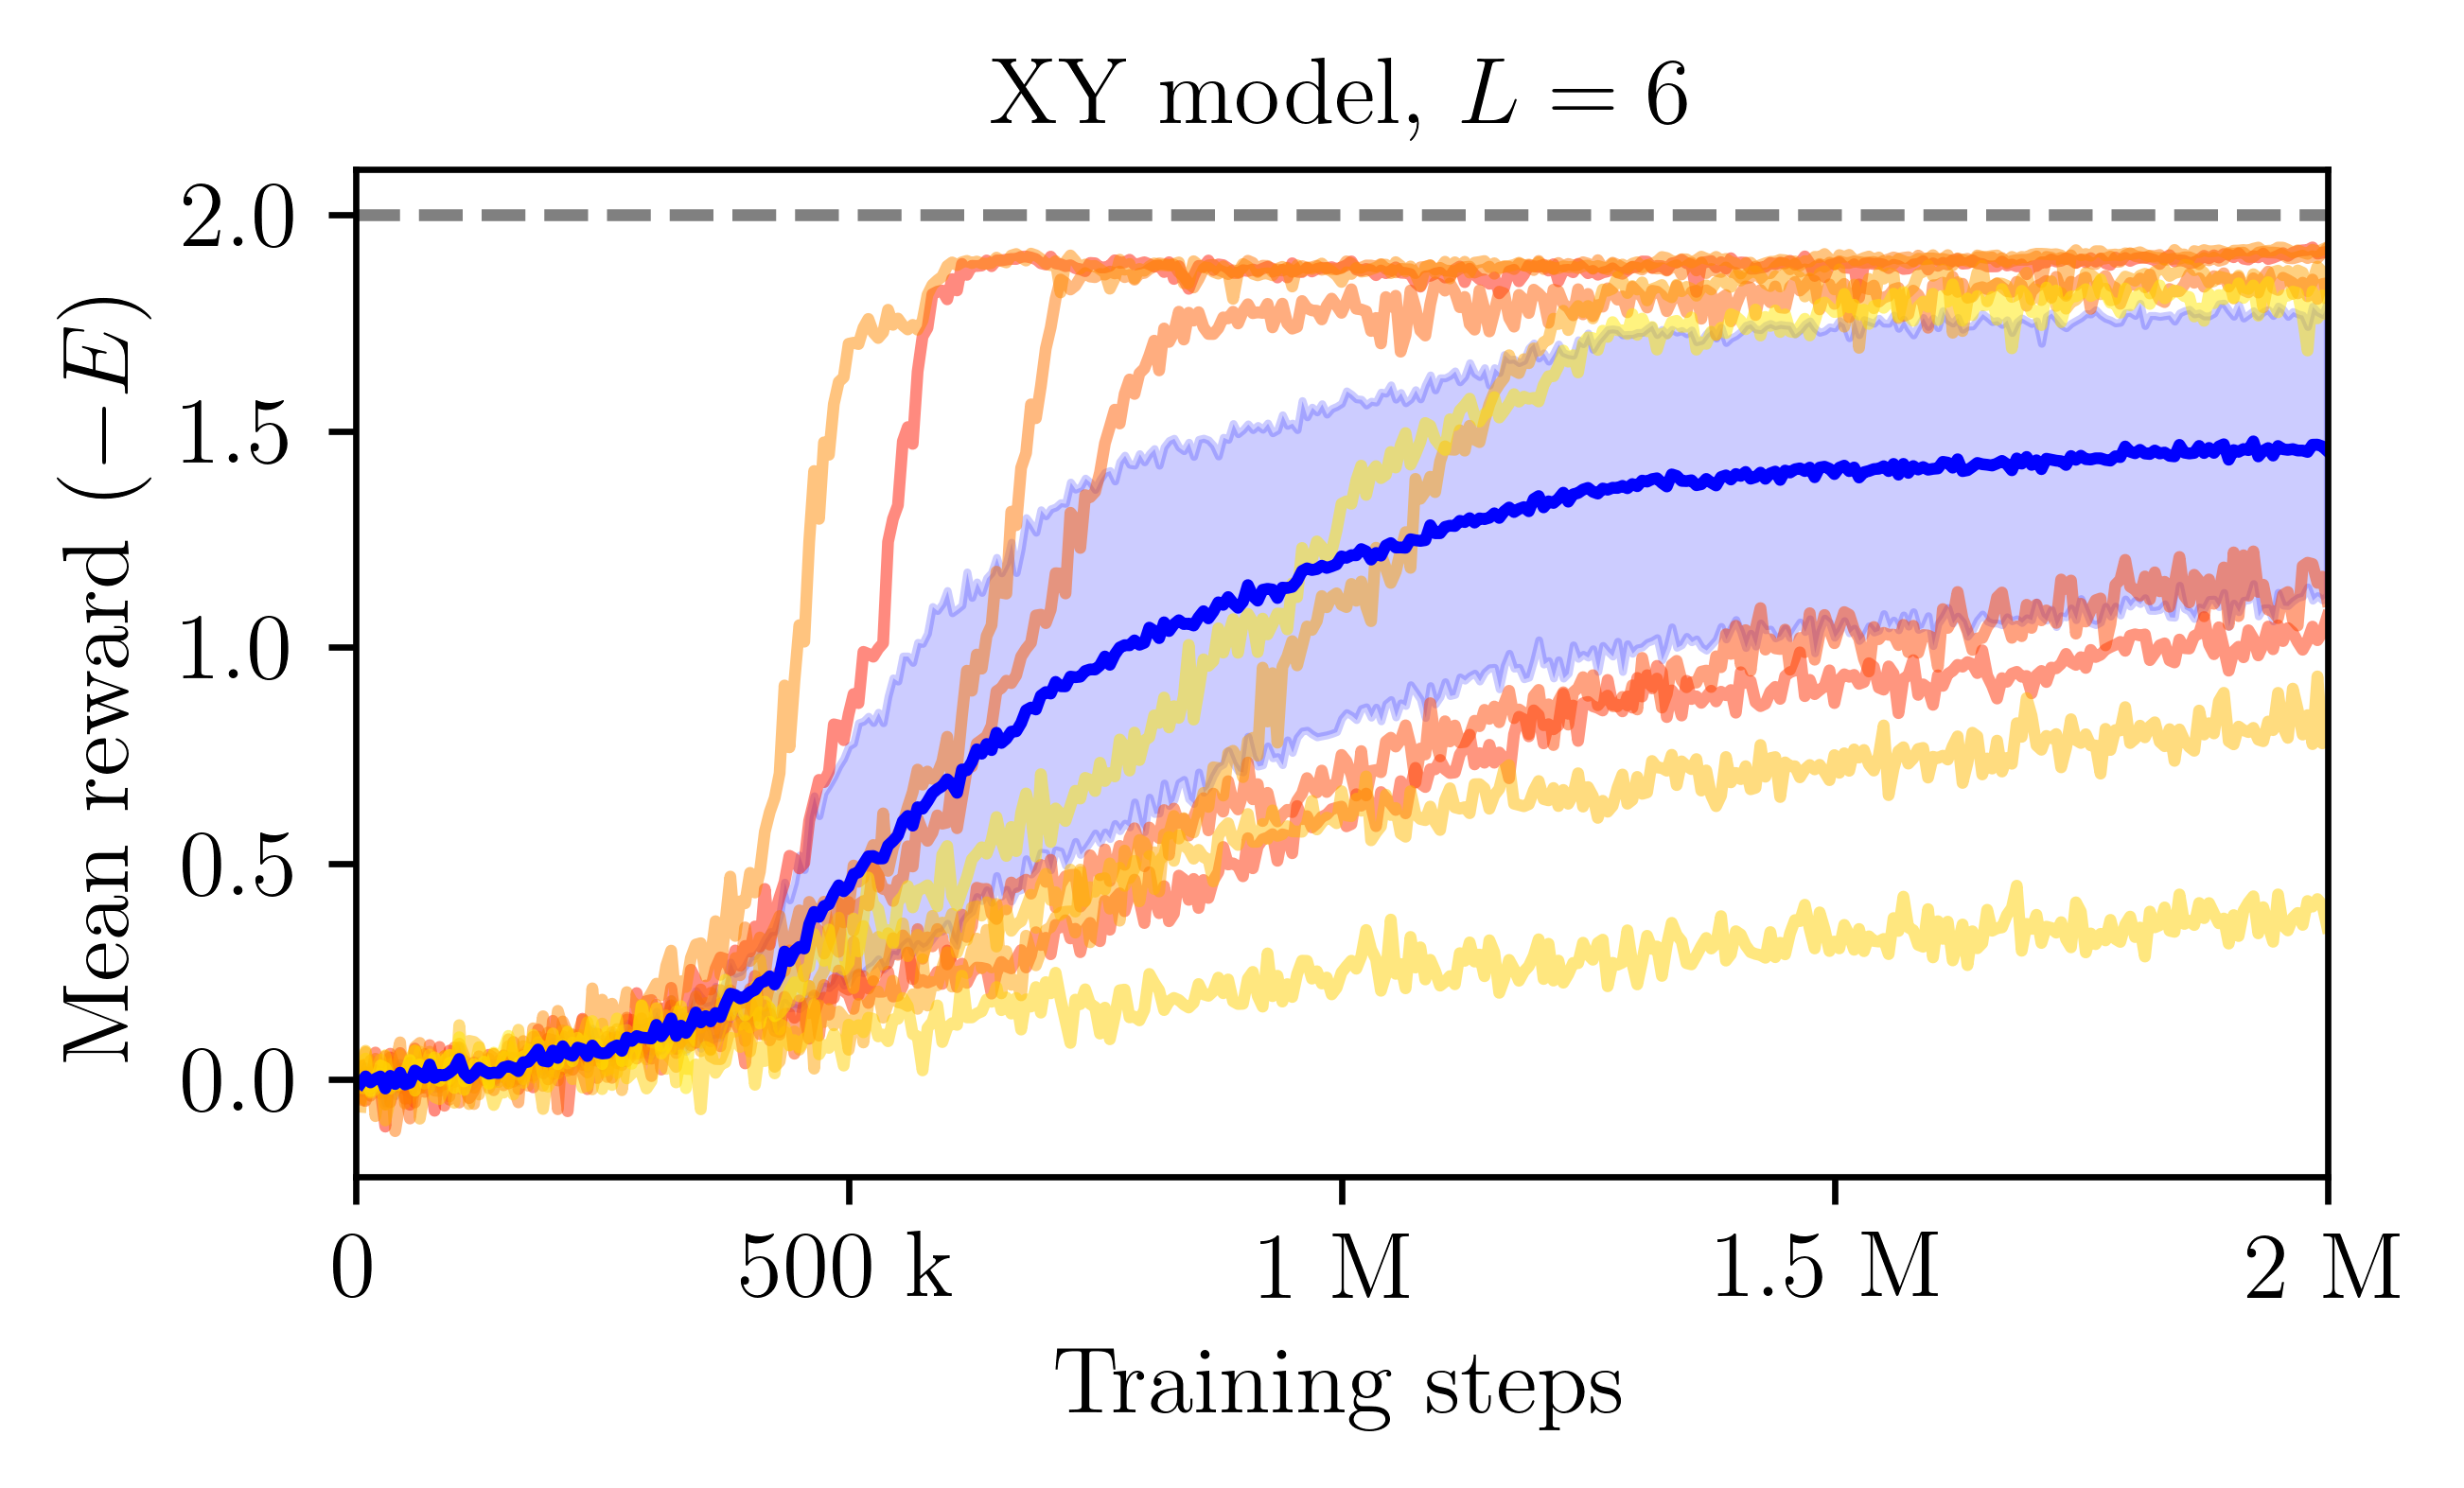

In [74]:
df_val = df[df["run"].str.contains("xy2D/L6/2") & df["tag"].str.contains("eval/mean_reward")]

fig, ax = plt.subplots(figsize=(textwidth, textwidth / golden_ratio))

sns.lineplot(ax=ax, data=df_val, x="step", y="value", errorbar=('ci', 95), hue='run', alpha=0.5, palette="autumn")
sns.lineplot(ax=ax, data=df_val, x="step", y="value", errorbar=('ci', 95), color="blue")


ax.xaxis.set_major_formatter(EngFormatter())
plt.xlim(0, df_val["step"].max()) 
plt.xlabel("Training steps")
plt.ylabel("Mean reward $(-E)$")
plt.legend().remove()

ax.hlines(2, 0, df_val["step"].max(), linestyles="dashed", label="True minimum", color="gray")
plt.title("XY model, $L=6$")
plt.savefig("../results/xy_L6_training.pdf")


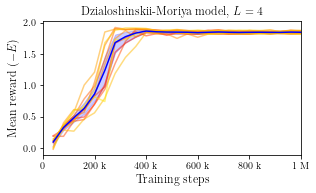

In [16]:
df_val = df[df["run"].str.contains("dzmoriya2D/L4/") & df["tag"].str.contains("eval/mean_reward")]

fig, ax = plt.subplots(figsize=(textwidth, textwidth / golden_ratio))

sns.lineplot(ax=ax, data=df_val, x="step", y="value", errorbar=('ci', 95), hue='run', alpha=0.5, palette="autumn")
sns.lineplot(ax=ax, data=df_val, x="step", y="value", errorbar=('ci', 95), color="blue")

ax.xaxis.set_major_formatter(EngFormatter())
plt.xlim(0, df_val["step"].max()) 
plt.xlabel("Training steps")
plt.ylabel("Mean reward $(-E)$")
plt.legend().remove()

# ax.hlines(2, 0, df_val["step"].max(), linestyles="dashed", label="True minimum")
plt.title("Dzialoshinskii-Moriya model, $L=4$")
plt.savefig("../results/dzmoriya_L4_training.pdf")


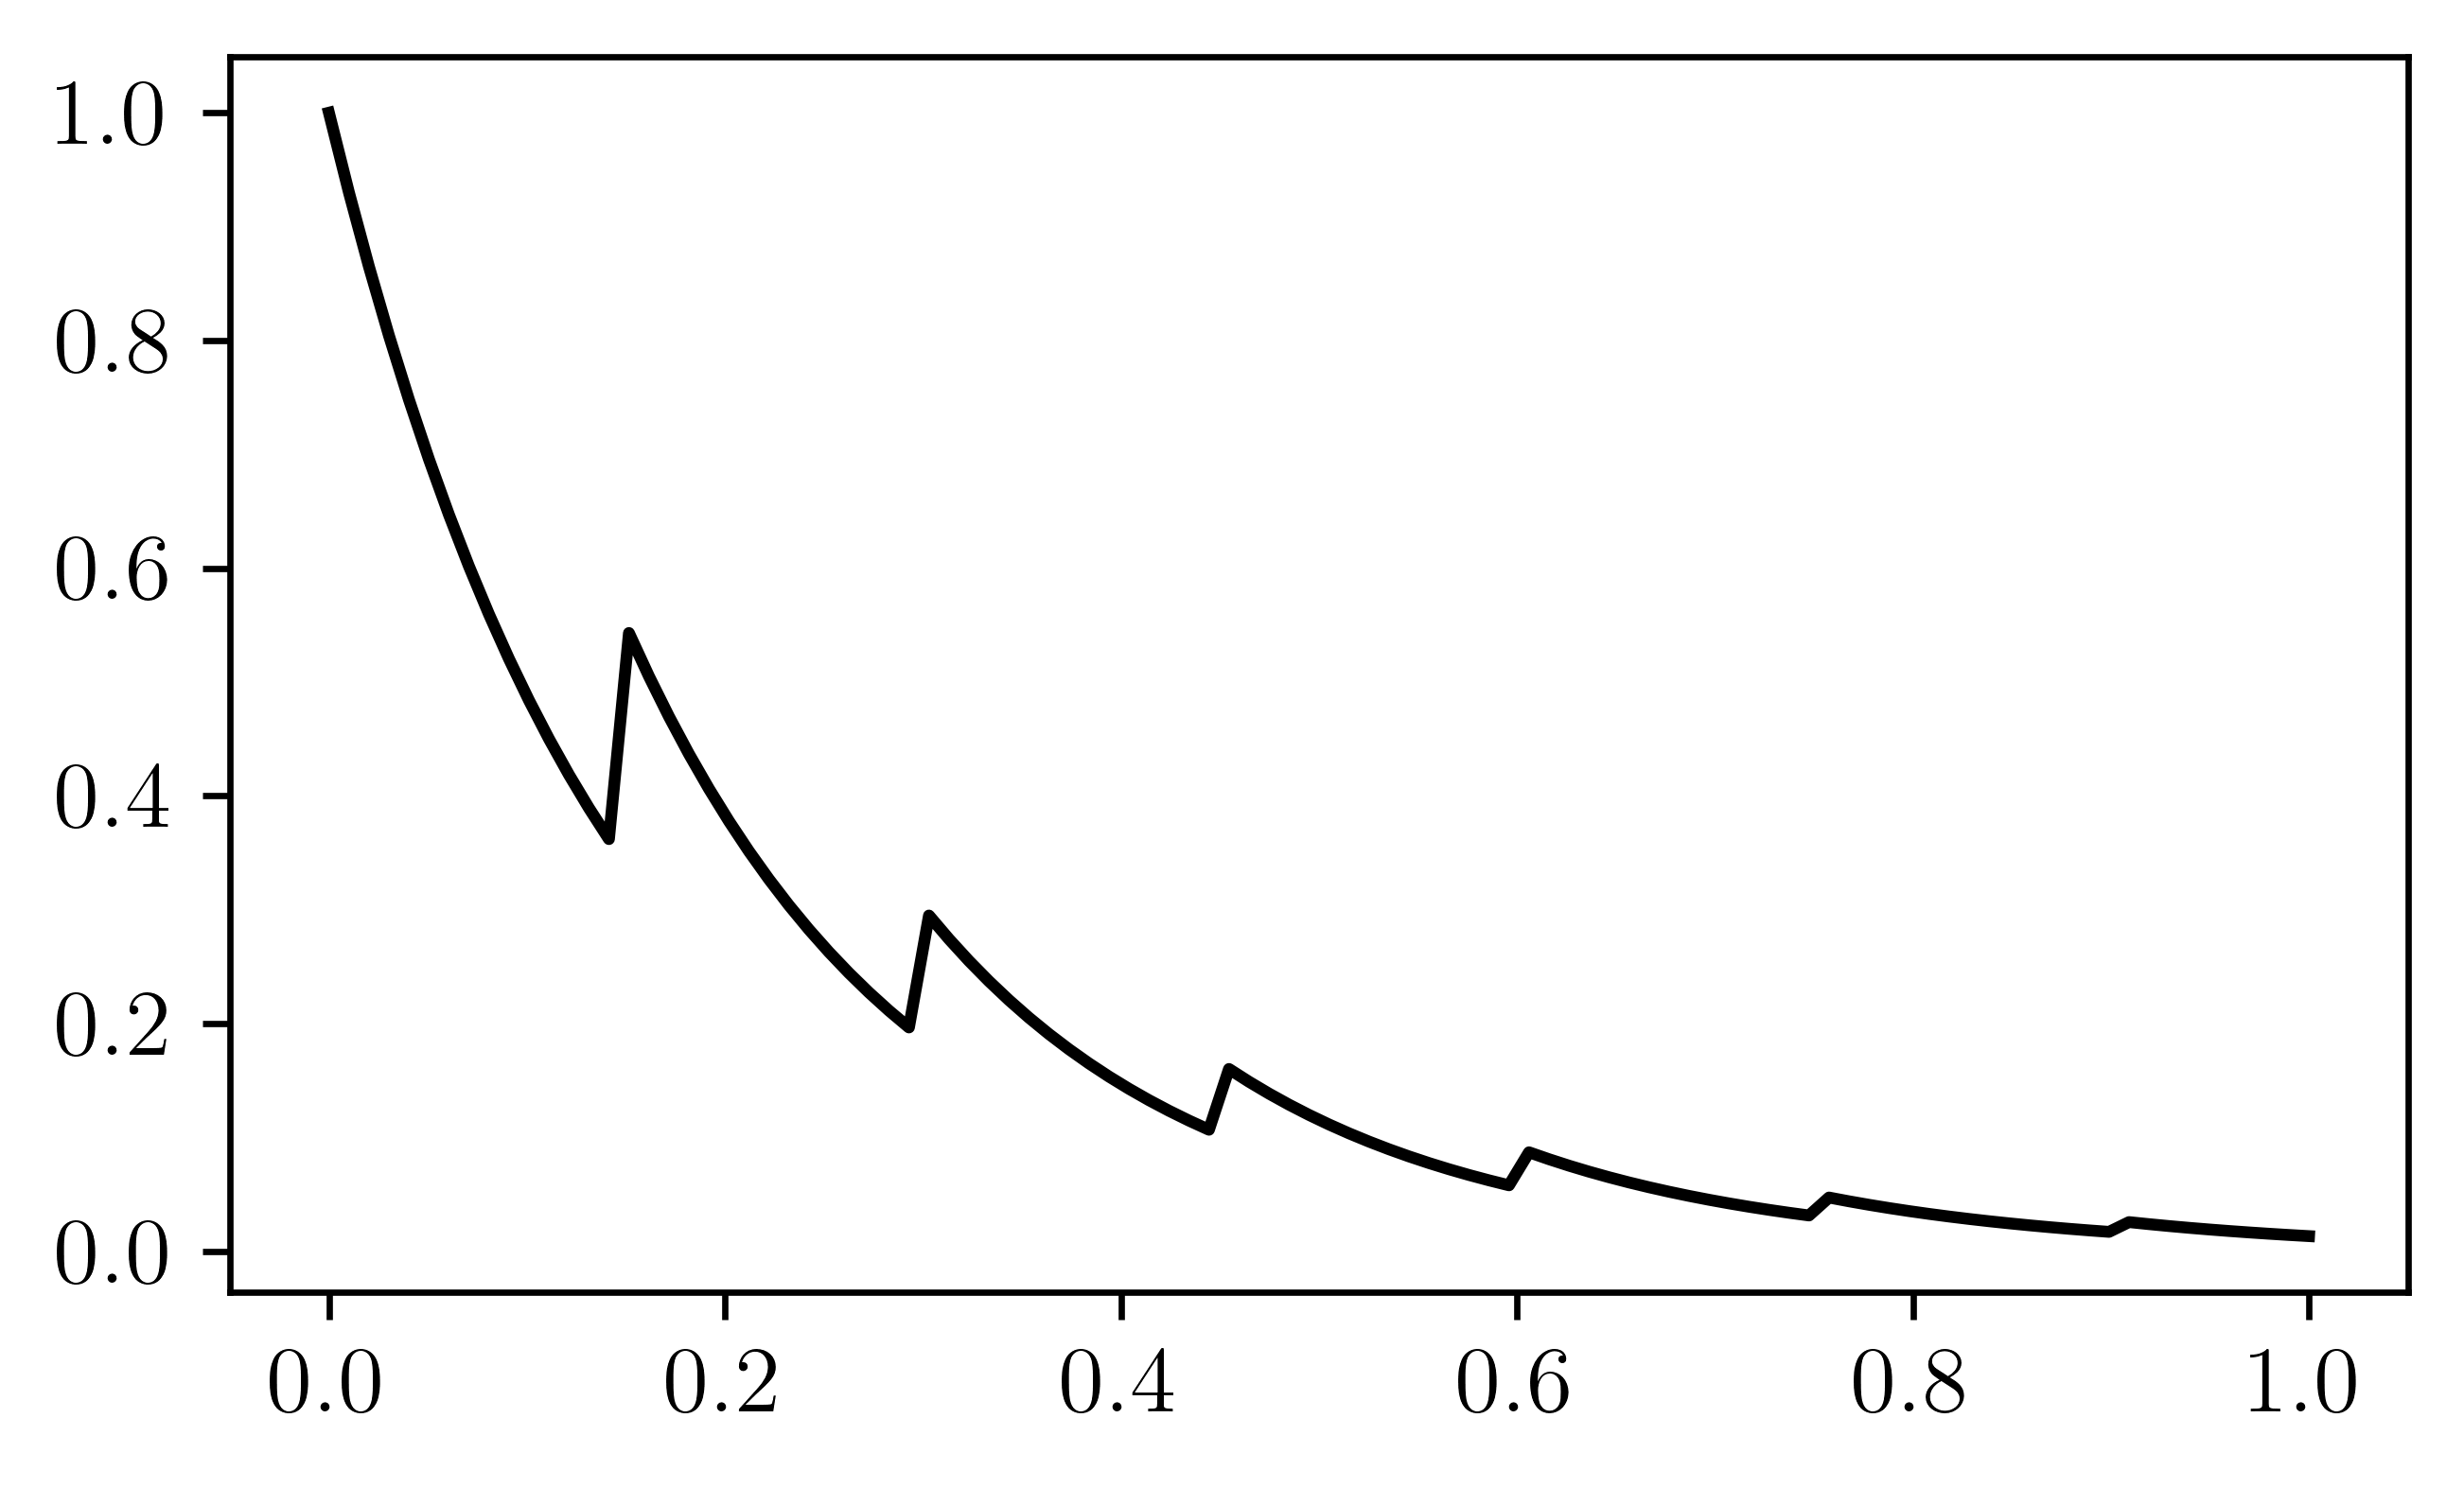

In [52]:
x = np.linspace(0, 1, 100)
# y = np.exp(-x)
y = np.zeros_like(x)
y[0] = 1
gamma = 0.93
for i in range(1, len(x)):
    if i % 15 == 0:
        y[i] = y[i-1] * 1.5
    else:
        y[i] = y[i-1] * gamma

plt.plot(x,y, color="black")
plt.savefig("../results/decay.svg")